**INTERPRETABILITY OF A MODEL**

Using Linear Models, Decision Trees, AutoML


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
#Reading the csv and creating a dataframe

first_df = pd.read_csv('/content/weatherHistory.csv')

first_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
first_df.shape

(96453, 12)

In [ ]:
first_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


**Cleaning the Data**

In [ ]:
# Checking for duplicate and null values

print(f"The number of null values in df is: \n {first_df.isna().sum()}")

print(f"The number of duplicate values in df is \n {first_df.duplicated().sum()}")

missing_values_percentage = (first_df.isna().sum() / len(first_df) * 100)

print(f"The percentage of missing values in df is \n {missing_values_percentage}")

The number of null values in df is: 
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
The number of duplicate values in df is 
 24
The percentage of missing values in df is 
 Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64


In [ ]:
# Removing the duplicates and null values from the df and initializing cleaned df

clean_df = first_df.dropna()

print(f"The number of null values in the clean_df is: \n {clean_df.isna().sum()}")

#Removing the duplicates from the clean_df

cleansed_df = clean_df.drop_duplicates()

print(f"The number of duplicates in the cleansed_df is: \n {cleansed_df.duplicated().sum()}")




The number of null values in the clean_df is: 
 Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
The number of duplicates in the cleansed_df is: 
 0


**Data Exploration and Visualization**

In [ ]:
cleansed_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.0,95912.000000
mean,11.937975,10.859194,0.734844,10.806764,187.506986,10.362306,0.0,1003.146959
std,9.569620,10.716711,0.195717,6.920504,107.378309,4.174204,0.0,117.291484
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.594444,2.272222,0.600000,5.812100,116.000000,8.355900,0.0,1011.890000
50%,12.022222,12.022222,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
cleansed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


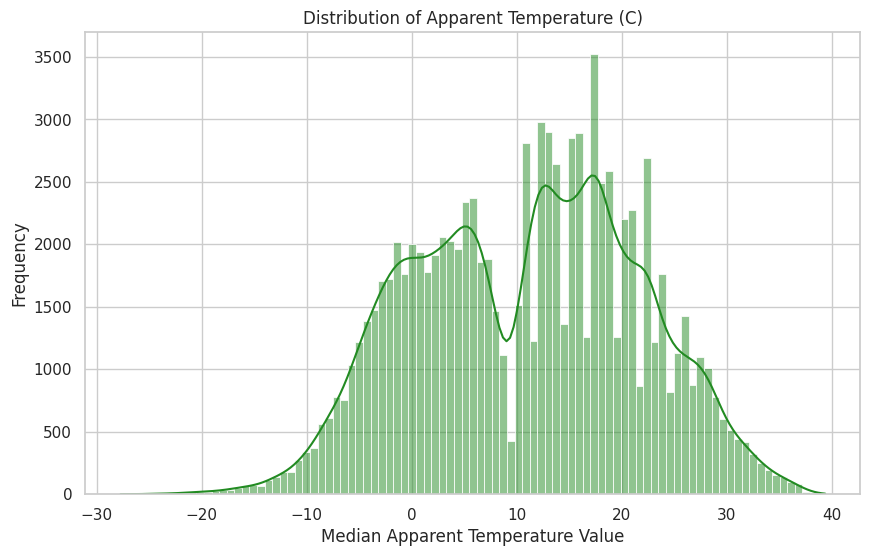

In [ ]:
# Plotting the distribution of the target variable

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(cleansed_df['Apparent Temperature (C)'], color='forestgreen', kde=True)
plt.title('Distribution of Apparent Temperature (C)')
plt.xlabel('Median Apparent Temperature Value')
plt.ylabel('Frequency')
plt.show()


['rain' 'snow']


<Axes: xlabel='Precip Type', ylabel='Count'>

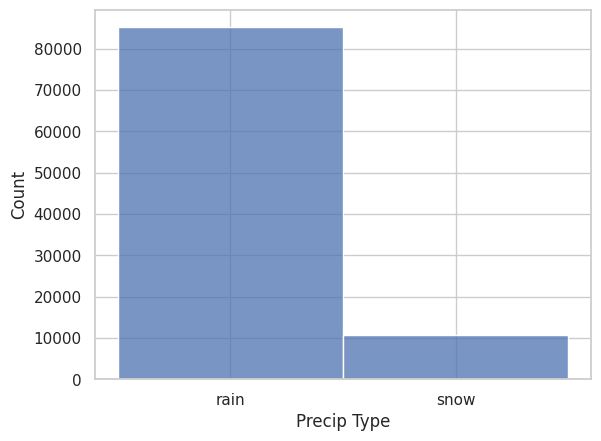

In [ ]:
print(cleansed_df['Precip Type'].unique())
sns.histplot(data=cleansed_df,x='Precip Type')

In [ ]:
cleansed_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

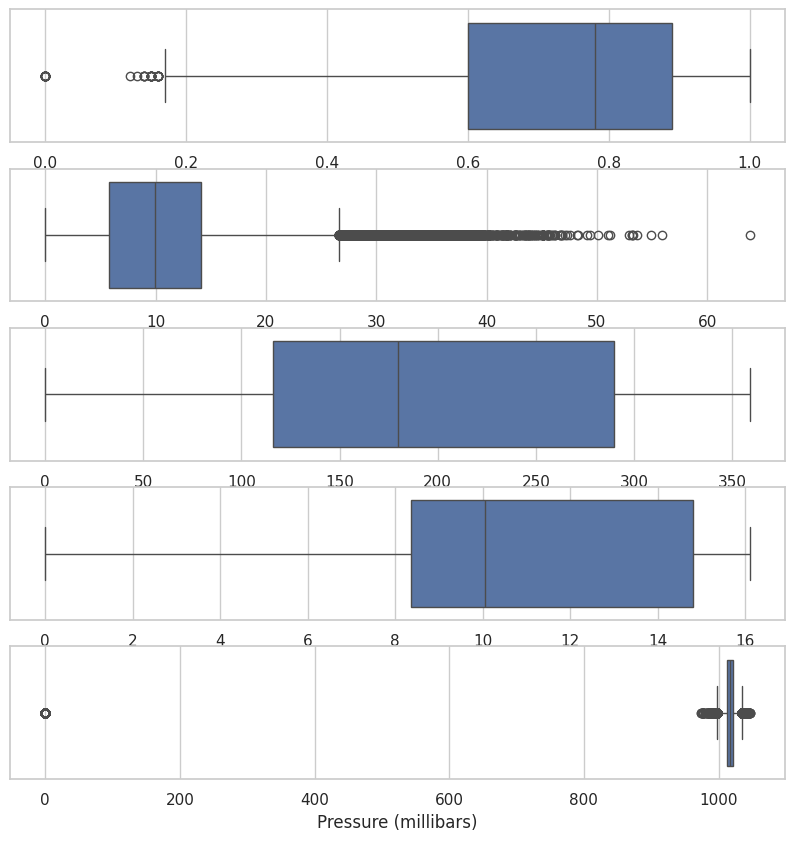

In [ ]:
cols =['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)' , 'Visibility (km)', 'Pressure (millibars)']
figure,axis = plt.subplots(5,1,figsize=(10,10))
c=0
for i in range(5):
    sns.boxplot(data=cleansed_df,x=cols[c],ax=axis[c])
    c+=1

In [ ]:
# Categorical variables in the df
categorical=[]
for col in cleansed_df.columns:
    if(cleansed_df[col].dtype == 'O'):
        categorical.append(col)
categorical

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [ ]:
# Numerical variables in the df
numerical=[]
for col in cleansed_df.columns:
  if(cleansed_df[col].dtype != 'O'):
    numerical.append(col)
numerical

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [ ]:
# Dropping unnecessary columns
cleansed_df.drop(columns=['Loud Cover', 'Formatted Date', 'Summary', 'Daily Summary'],inplace=True)

cleansed_df

<ipython-input-14-23e5e4647024>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleansed_df.drop(columns=['Loud Cover', 'Formatted Date', 'Summary', 'Daily Summary'],inplace=True)


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:


weather_df = cleansed_df.copy()

weather_df


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


**Correlation Heatmap**

<ipython-input-16-a491bbe70492>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_df.corr(), annot=True, cmap='Greens')


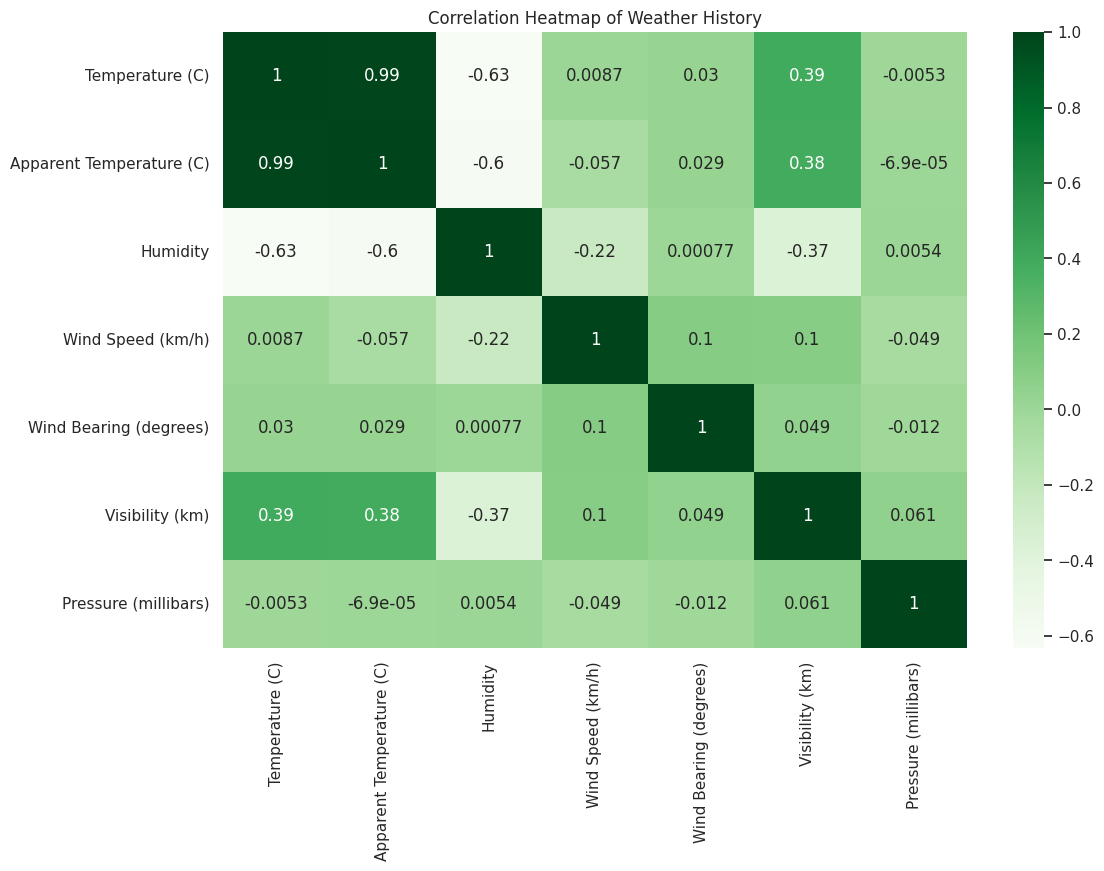

In [ ]:
# Finding out the relations between the predictor variables and target variables using heatmap


plt.figure(figsize=(12, 8))
sns.heatmap(weather_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Weather History')
plt.show()

Thus from the heatmap, it's clear that Apparent Temperature which is our Target variable/ Dependent variable is having strong co-relation with Temperature which is our predictor/ Independent Variable. Thus, we can apply *linear regression* happily as there is one dependent and independent variable.

In [ ]:
# Setting the X and y for fitting the data

X = weather_df['Temperature (C)']

y = weather_df['Apparent Temperature (C)']

In [ ]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42) #Splitting 30% of data into test data

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 67138 samples
Test set size: 28774 samples


# **Training the data for Linear Regression**

In [ ]:
X_train

84173     8.800000
32787    10.000000
14187     3.355556
19474    -4.866667
55742     0.000000
           ...    
6265     14.511111
54988     0.466667
76987     5.627778
860      19.161111
15795     5.000000
Name: Temperature (C), Length: 67138, dtype: float64

In [ ]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,Temperature (C)
84173,1.0,8.800000
32787,1.0,10.000000
14187,1.0,3.355556
19474,1.0,-4.866667
55742,1.0,0.000000
...,...,...
6265,1.0,14.511111
54988,1.0,0.466667
76987,1.0,5.627778
860,1.0,19.161111


In [ ]:
# Fit the Ordinary Least Squares model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.985
Model:                                  OLS   Adj. R-squared:                  0.985
Method:                       Least Squares   F-statistic:                 4.487e+06
Date:                      Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                              17:51:26   Log-Likelihood:            -1.1283e+05
No. Observations:                     67138   AIC:                         2.257e+05
Df Residuals:                         67136   BIC:                         2.257e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

# Prediction and Testing using Linear Regression

In [ ]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

93007     8.696877
95787    19.542355
52496    22.375636
43630    12.307921
79369     8.783295
           ...    
47396    -1.191829
3406     -5.327555
47517    25.603971
69400    21.647254
85992     1.517997
Length: 28774, dtype: float64

In [ ]:
X_test_const

,const,Temperature (C)
93007,1.0,9.988889
95787,1.0,19.750000
52496,1.0,22.300000
43630,1.0,13.238889
79369,1.0,10.066667
...,...,...
47396,1.0,1.088889
3406,1.0,-2.633333
47517,1.0,25.205556
69400,1.0,21.644444


# Checking OLS Assumptions


**1. Linearity**

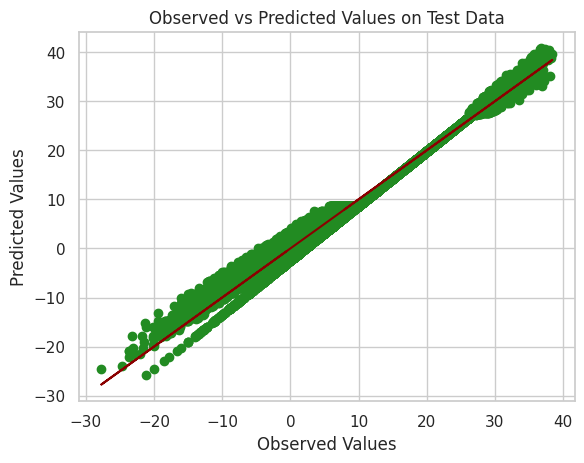

In [ ]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

Positive Linear Relationship: The red line (which represents a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship between the observed and predicted values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity.

**2. Random Sample**

In [ ]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is -0.0


While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

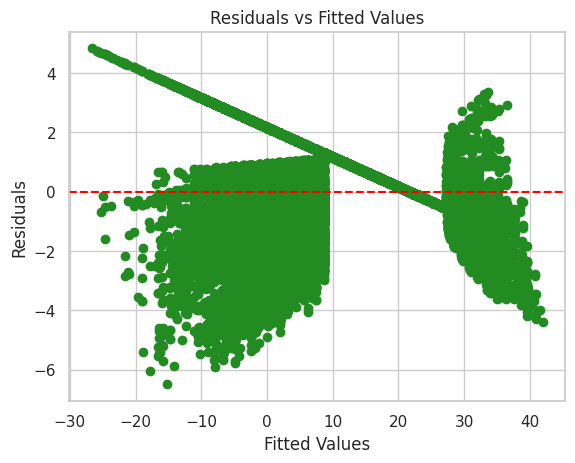

In [ ]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Train/Test/Evaluation of the linear Regression model


In [ ]:
from sklearn.linear_model import LinearRegression
# Create and fitting the model
lr = LinearRegression()

lr.fit(X_train_const, y_train)

#  Predictions of the model
y_pred = lr.predict(X_test_const)

print(y_pred)

[ 8.69687675 19.54235497 22.37563585 ... 25.60397115 21.64725428
  1.51799731]


# Validation of the linear regression model using MAE, MSE, RMSE


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# MAE validation
print(f"The mean absolute error of the model is: \n {mean_absolute_error(y_test ,y_pred)}")

# MSE validation
print(f"The mean squared error of the model is: \n {mean_squared_error(y_test ,y_pred)}")

#RMSE validation
print(f"The root mean squared error of the model is: \n {sqrt(mean_squared_error(y_test ,y_pred))}")

The mean absolute error of the model is: 
 0.9929192613433013
The mean squared error of the model is: 
 1.6812156008094474
The root mean squared error of the model is: 
 1.2966169830792158


**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_const)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test_const)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')
print(f'MSE on Test Set: {mse}')

RMSE on Test Set: 1.2966169830792158
MSE on Test Set: 1.6812156008094472


**Accuracy Score**

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print('The accuracy score is :',r_squared)

The accuracy score is : 0.9854658614257321


Input value 22.3
Predicted value -707.9293200000001
Actual Output 22.3


# SHAP ANALYSIS ON THE LINEAR MODEL

Because, we've trained our model using only one predictor varaible, it's practically useless to perform SHAP analysis. Hence, I am re-training the model with all the features.


In [ ]:
weather_df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

target = ['Apparent Temperature (C)']

X = weather_df[features]

y = weather_df[target]

# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)


# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 76729 samples
Test set size: 19183 samples


# Training the model on OLS method

In [ ]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
78813,1.0,17.200000,0.96,3.1556,301.0,6.5688,1014.32
69069,1.0,17.600000,0.66,19.8513,170.0,15.9229,1019.64
61492,1.0,9.355556,0.96,10.8192,299.0,15.8263,1013.98
11409,1.0,-0.022222,0.58,26.1464,149.0,9.9820,1018.20
22768,1.0,9.238889,0.51,23.2967,306.0,11.3988,1012.91
...,...,...,...,...,...,...,...
788,1.0,19.338889,0.70,7.3255,280.0,11.3988,1008.55
93019,1.0,5.638889,0.73,10.9319,253.0,15.0213,1013.01
74569,1.0,17.777778,0.87,6.4400,340.0,16.0517,1017.15
28044,1.0,-7.222222,0.88,25.7600,70.0,3.5420,1004.40


In [ ]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 1.250e+06
Date:                      Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                              19:24:48   Log-Likelihood:            -1.1473e+05
No. Observations:                     76729   AIC:                         2.295e+05
Df Residuals:                         76722   BIC:                         2.295e+05
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [ ]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

69739    13.774540
85732     6.007689
46129    -4.152735
11355     0.513335
6854     -2.148881
           ...    
75927     6.722036
62331    15.073713
29395    -1.814144
95953    14.715275
62653    35.323051
Length: 19183, dtype: float64

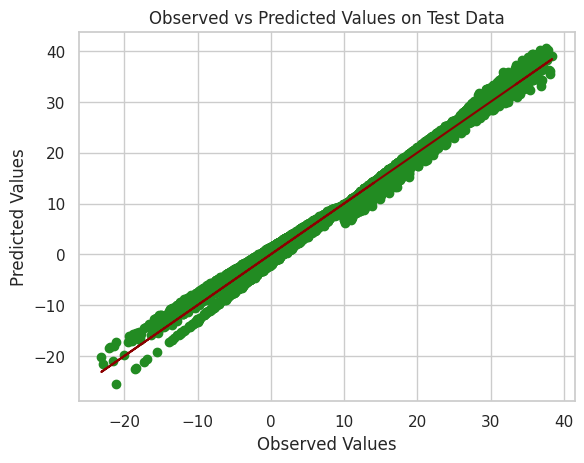

In [ ]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 1.0748664111915343


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.8 MB/s eta 0:00:00


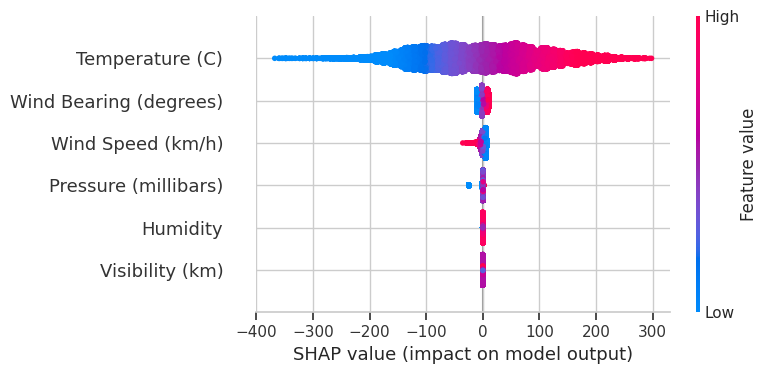

In [ ]:
import shap
import pandas as pd

explainer = shap.LinearExplainer(lr, X )
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

# Fitting the tree model

Fitting the decision tree


In [ ]:
weather_df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
tree_df = weather_df.copy()
tree_df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
X = tree_df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]

y = tree_df['Apparent Temperature (C)']

In [ ]:
# Specifying the target and predictor variables again for safe side

#X = weather_df['Temperature (C)']

#y = weather_df['Apparent Temperature (C)']

# Since, for decision tree I need to give them in 2D array format, otherwise it's gonna throw an error. I am reshaping them into 2D array

# import numpy as np

# print(weather_df['Apparent Temperature (C)'].dtype)
# print(type(weather_df['Temperature (C)']))
# print(weather_df['Temperature (C)'].shape)

float64
<class 'pandas.core.series.Series'>
(95912,)


In [ ]:

from sklearn.tree import DecisionTreeRegressor

# Creating the decision tree regressor model
tree_regressor = DecisionTreeRegressor(random_state=1)


# Fitting the model with your predictor and target variables
tree_regressor.fit(X, y)


DecisionTreeRegressor(random_state=1)

In [ ]:
print("Making predictions for the following 5 records:")
print(X.head())
print("The predictions are")
print(tree_regressor.predict(X.head()))

Making predictions for the following 5 records:
   Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0         9.472222      0.89            14.1197                   251.0   
1         9.355556      0.86            14.2646                   259.0   
2         9.377778      0.89             3.9284                   204.0   
3         8.288889      0.83            14.1036                   269.0   
4         8.755556      0.83            11.0446                   259.0   

   Visibility (km)  Pressure (millibars)  
0          15.8263               1015.13  
1          15.8263               1015.63  
2          14.9569               1015.94  
3          15.8263               1016.41  
4          15.8263               1016.51  
The predictions are
[7.38888889 7.22777778 9.37777778 5.94444444 6.97777778]


# Validations


In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error

predicted_app_temp = tree_regressor.predict(X)
mean_absolute_error(y, predicted_app_temp)

4.849287345322856e-15

In [ ]:
# Training and testing split

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)
# Defining model
temp_model = DecisionTreeRegressor()
# Fit model
temp_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = temp_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.025976124693742067


# Checking for underfitting or overfitting

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


# Fitting a random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
temp_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, temp_preds))

# SHAP analysis on the Tree model


In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=80, random_state=42)
rf_regressor.fit(X_train, y_train)

# Calculate SHAP values for the test data
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Finally, AutoML

In [ ]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.8 MB/s eta 0:00:00


In [ ]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(rc={"figure.figsize": (16, 8)})